In [1]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n-seg.pt")  # load an official model
# model = YOLO("path/to/best.pt")  # load a custom model
# model.to(device)
# Predict with the model
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image

Ultralytics YOLOv8.0.39  Python-3.7.9 torch-1.13.1+cpu CPU
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 C:\Users\piyalong\ultralytics\bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 595.5ms
Speed: 5.0ms pre-process, 595.5ms inference, 51.1ms postprocess per image at shape (1, 3, 640, 640)


In [2]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import cv2

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import random 
import torch

classes = model.model.names

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch. set_grad_enabled(False)

def get_random_color():
    color = [random.randint(0, 255) for _ in range(3)]
    return color

# Generate 80 random colors for the COCO 80 classes
colors = [get_random_color() for _ in range(len(classes))]

In [5]:
classes[0]

'person'

In [6]:
# x1, y1, x2, y2, conf, label=i


0: 640x480 4 persons, 1 bus, 1 skateboard, 97.7ms
Speed: 0.0ms pre-process, 97.7ms inference, 15.6ms postprocess per image at shape (1, 3, 640, 640)


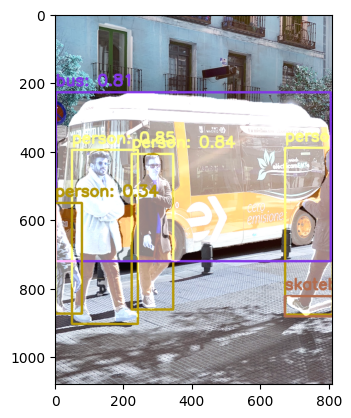

In [7]:
import requests
from PIL import Image

url = "https://ultralytics.com/images/bus.jpg"
response = requests.get(url)

with open("bus.jpg", "wb") as f:
    f.write(response.content)

img = Image.open("bus.jpg")

results = model(img)  # predict on an image

cv2_image = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
im=cv2_image.copy()


for b,m in zip(results[0].boxes.boxes.cpu().numpy(),results[0].masks.masks.cpu().numpy()):
    # print(np.sum(mask))
    x1, y1, x2, y2, conf, label=b
    x1, y1, x2, y2,label=[int(i) for i in [x1, y1, x2, y2,label]]
    new = cv2.rectangle(im, (x1, y1), (x2, y2), colors[int(label)], 5)
    
    text = f'{classes[label]}: {conf:0.2f}'
    cv2.putText(im,text,(int(x1), int(y1-20)), cv2.FONT_HERSHEY_SIMPLEX, 1.5, colors[int(label)], 5)
    mask = cv2.cvtColor(m.astype("uint8"),cv2.COLOR_GRAY2RGB)*255    
    mask =cv2.resize(mask,(im.shape[1],im.shape[0]))
    im = cv2.addWeighted(im, 1, mask, 0.5,1)
    
    
plt.imshow(im)
    # break

In [8]:
for m in results[0].masks.masks.cpu().numpy():
    print(np.sum(m))

7982.0
18249.0
11808.0
90330.0
4324.0
858.0


In [9]:
classes

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [10]:
cv2_image.shape,mask.shape

((1080, 810, 3), (1080, 810, 3))

In [11]:
cv2.resize(mask,(cv2_image.shape[1],cv2_image.shape[0])).shape

(1080, 810, 3)

In [12]:
mask = np.where(m==1,255,0)

In [13]:
np.min(m)

0.0

In [ ]:
mask.shape

In [ ]:
mask = cv2.cvtColor(m.astype("uint8"),cv2.COLOR_GRAY2RGB)*255

In [ ]:
plt.imshow(mask)

In [ ]:


img_array = results[0].masks[1].masks.cpu().numpy()

type(img_array) 

plt.imshow(img_array)


In [ ]:
mask = results[0].masks[0].cpu().numpy()

In [ ]:
type(img_array) 

In [ ]:
img_array.shape

In [ ]:
results[0].masks[0].masks.shape

In [53]:
import cv2


In [54]:
w,h,fps

(2560, 1440, 30)

In [18]:
# file_path='D:/2023-02-10-SAMPLE_CUT - NVRCH01-092634-093134 - CallanGates (1).mp4'
# file_path='D:/2023-02-10-SAMPLE_CUT - NVRCH01-092634-093134 - CallanGates (1).mp4'

model_name = "yolov8x-seg.pt"
model = YOLO(model_name)  # load an official model


file_path='C:/Users/piyalong/TAMU BCS Animal/TAMU BCS Animal Example Video/rec_2022_06_19_07_36_04.mp4'
file_path='D:/NVRCH01-033921-034421.mp4'

video_capture = cv2.VideoCapture(file_path)
w = int(video_capture.get(3))
h = int(video_capture.get(4))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = int(video_capture.get(cv2.CAP_PROP_FPS))
out = cv2.VideoWriter(file_path[:-4]+'_{}_detection.avi'.format(model_name), fourcc, fps, (w, h))


mask_data={}
frame_number=0
while True:
    ret, frame = video_capture.read()  # frame shape 640*480*3
    if ret != True:
        break
        
    im=frame.copy()

    results = model(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))  
    if len(results[0])==0 :
        out.write(frame)
        continue

    for b,m in zip(results[0].boxes.boxes.cpu().numpy(),results[0].masks.masks.cpu().numpy()):
        
        x1, y1, x2, y2, conf, label=b
        x1, y1, x2, y2,label=[int(i) for i in [x1, y1, x2, y2,label]]
        
        # if label!=19:continue
        new = cv2.rectangle(im, (x1, y1), (x2, y2), colors[int(label)], 5)

        text = f'{classes[label]}: {conf:0.2f}'
        cv2.putText(im,text,(int(x1), int(y1-20)), cv2.FONT_HERSHEY_SIMPLEX, 1.5, colors[int(label)], 5)
        mask = cv2.cvtColor(m.astype("uint8"),cv2.COLOR_GRAY2RGB)*255    
        mask =cv2.resize(mask,(im.shape[1],im.shape[0]))
        im = cv2.addWeighted(im, 1, mask, 0.5,1)

    # Convert RGB to BGR 
    cv2_image = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
    open_cv_image = cv2.resize(cv2_image,(int(im.shape[1]/2),int(im.shape[0]/2)))
    cv2.imshow("Output", open_cv_image)
    out.write(cv2_image)
    frame_number+=1
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
out.release()
cv2.destroyAllWindows()

Ultralytics YOLOv8.0.39  Python-3.7.9 torch-1.13.1+cpu CPU
YOLOv8x-seg summary (fused): 295 layers, 71797696 parameters, 0 gradients, 344.1 GFLOPs

0: 384x640 5 cows, 908.2ms
Speed: 3.0ms pre-process, 908.2ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 5 cows, 904.9ms
Speed: 0.0ms pre-process, 904.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 5 cows, 957.1ms
Speed: 1.0ms pre-process, 957.1ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 5 cows, 1156.3ms
Speed: 1.0ms pre-process, 1156.3ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 5 cows, 1111.9ms
Speed: 1.0ms pre-process, 1111.9ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 5 cows, 1118.3ms
Speed: 1.0ms pre-process, 1118.3ms inference, 5.8ms postprocess per image at shape (1, 3, 640, 640)

0: 384x640 5 cows, 1123.4ms
Speed: 1.0ms pre-process, 1123.4ms inference, 6.0ms post

In [ ]:
cv2.destroyAllWindows()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
image=img
# Define the class labels for the objects in the image
class_labels = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6']
result=results[0]
# Get the bounding box coordinates and mask predictions
boxes = result.boxes.cpu().numpy()
masks = result.masks.cpu().numpy()

# Plot the bounding boxes and masks
fig, axs = plt.subplots(2, 3, figsize=(10, 7))

for i, ax in enumerate(axs.flat):
    # Plot the image
    ax.imshow(image)

    # Plot the bounding boxes
    for box in boxes[i]:
        x1, y1, x2, y2, conf, cls = box
        if conf > 0.5:
            label = class_labels[int(cls)]
            color = np.random.rand(3)
            rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, edgecolor=color, linewidth=2)
            ax.add_patch(rect)
            ax.text(x1, y1, label, bbox={'facecolor': color, 'alpha': 0.5}, fontsize=8)

    # Plot the masks
    for j, mask in enumerate(masks[i]):
        mask = np.round(mask)
        ax.imshow(np.dstack((mask, np.zeros_like(mask), np.zeros_like(mask))), alpha=0.5)

    # Remove the x and y ticks
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


In [ ]:
box